<a href="https://colab.research.google.com/github/Nishme-tech/MNIST-Handwritten-digit-classification/blob/main/MNIST_handwritten_digit_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

load a MNIST dataset

In [21]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

normalize pixel values to [0,1]

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

define the MLP model

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), # flatten 28 * 28 image to 1D arrya
                          keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons
                          keras.layers.Dense(10, activation='softmax')]) # output layer with 10 classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile the model

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

training model

In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8758 - loss: 0.4342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9659 - loss: 0.1155
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0585
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9907 - loss: 0.0320
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0197
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9961 - loss: 0.0150
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9963 - loss: 0.0131


Evaluate on Test data

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.1107
Test accuracy: 0.9760000109672546


show first 9 images from trainig set

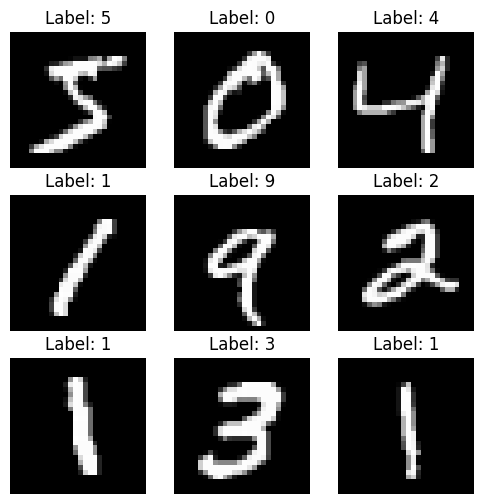

In [27]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

select an image from test set

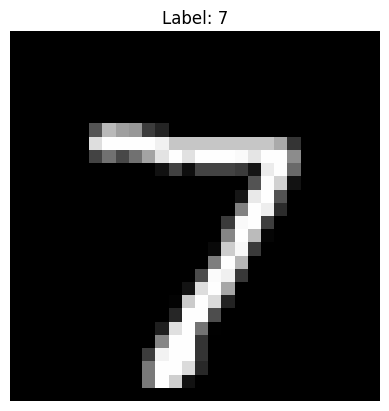

In [28]:
index = 0
image = x_test[index]
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_test[index]}")
plt.axis('off')
plt.show()

model predection

In [29]:
predection = model.predict(np.array(image.reshape(1,28,28)))
predicted_label  = np.argmax(predection)
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted label: 7
